In [1]:
# Import dependencies
import json
import numpy as np
import os
import pandas as pd
import re  # regular expressions

In [2]:
filepath = '../'

In [3]:
with open(f'{filepath}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

len(wiki_movies_raw)

7311

In [4]:
# Show first 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [5]:
# Show 5 records (approximately) in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [6]:
# Show last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Extract Kaggle data
kaggle_metadata = pd.read_csv(f'{filepath}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{filepath}ratings.csv')

In [8]:
display(kaggle_metadata.head())
display(kaggle_metadata.sample(5))
display(kaggle_metadata.tail())

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19907,False,NaN,1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,220106,tt0792984,fr,On ne devrait pas exister,Herve is a star in the porn industry. Exhauste...,...,2006-05-23,0.0,0.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,We Should Not Exist,False,6.8,2.0
13335,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",http://www.notorious09.com,14410,tt0472198,en,Notorious,NOTORIOUS is the story of Christopher Wallace....,...,2009-01-16,43051547.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The story of the man behind the legend.,Notorious,False,6.6,163.0
4361,False,NaN,39000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,9602,tt0094898,en,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",...,1988-06-28,288752301.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Four Funniest Men in America are Eddie Mur...,Coming to America,False,6.5,944.0
15511,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",http://www.warnerbros.com/batman-under-red-hood,40662,tt1569923,en,Batman: Under the Red Hood,Batman faces his ultimate challenge as the mys...,...,2010-07-27,6629178.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Dare to Look Beneath the Hood.,Batman: Under the Red Hood,False,7.6,459.0
41862,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://magic.wizards.com/en/content/enter-the-...,394176,tt5628044,en,Enter the Battlefield: Life on the Magic - The...,Magic: The Gathering is the most popular colle...,...,2016-04-26,0.0,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Enter the Battlefield: Life on the Magic - The...,False,6.5,4.0


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [9]:
df_wiki_movies = pd.DataFrame(wiki_movies_raw)

df_wiki_movies.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_wiki_movies.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [11]:
sorted(df_wiki_movies.columns.to_list())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [12]:
# Filter wiki_movies_raw to contain only movies that have both a director and an IMDB link
wiki_movies = [movie for movie in wiki_movies_raw if ('Directed by' in movie or 'Director' in movie) and 'imdb_link' in movie]

len(wiki_movies)

7080

In [13]:
pd.DataFrame(wiki_movies).dtypes

url            object
year            int64
imdb_link      object
title          object
Directed by    object
                ...  
Arabic         object
Romanized      object
Russian        object
Hebrew         object
Polish         object
Length: 78, dtype: object

In [14]:
# Iterate data cleanup
wiki_movies = [movie for movie in wiki_movies_raw
    if True
    and ('Directed by' in movie or 'Director' in movie)
    and 'imdb_link' in movie
    and 'No. of episodes' not in movie
]

len(wiki_movies)

7076

In [15]:
pd.DataFrame(wiki_movies).dtypes

url            object
year            int64
imdb_link      object
title          object
Directed by    object
                ...  
Arabic         object
Romanized      object
Russian        object
Hebrew         object
Polish         object
Length: 75, dtype: object

# 8.3.5 Create a Function to Clean the Data, Part 1

In [16]:
# Find movies in Arabic
df_wiki_movies[df_wiki_movies['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7060,https://en.wikipedia.org/wiki/The_Insult_(film),2018.0,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7293,https://en.wikipedia.org/wiki/Capernaum_(film),2018.0,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_wiki_movies[df_wiki_movies['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [18]:
sorted([
#     'Actor control',
#     'Adaptation by',
#     'Alias',
#     'Alma mater',
    'Also known as',  # Not on Module's list
#     'Animation by',
    'Arabic',
#     'Area',
#     'Area served',
#     'Artist(s)',
#     'Attraction type',
#     'Audio format',
#     'Author',
#     'Based on',
#     'Biographical data',
    'Bopomofo',  # Not on Module's list
#     'Born',
#     'Box office',
#     'Budget',
#     'Camera setup',
    'Cantonese',
#     'Characters',
#     'Children',
    'Chinese',
#     'Cinematography',
#     'Closing date',
#     'Color process',
#     'Comics',
#     'Composer(s)',
#     'Coordinates',
#     'Country',
#     'Country of origin',
#     'Cover artist',
#     'Created by',
#     'Date premiered',
#     'Designer(s)',
#     'Developed by',
#     'Developer(s)',
#     'Dewey Decimal',
#     'Died',
#     'Directed by',
#     'Director',
#     'Distributed by',
#     'Distributor',
#     'Divisions',
#     'Duration',
#     'Edited by',
#     'Editor(s)',
#     'Ending theme',
#     'Engine',
#     'Engine(s)',
#     'Executive producer(s)',
#     'Family',
#     'Fate',
#     'Film(s)',
#     'Followed by',
#     'Format(s)',
#     'Formerly',
#     'Founded',
#     'Founder',
#     'Founders',
    'French',
#     'Full name',
#     'Gender',
#     'Genre',
#     'Genre(s)',
#     'Genres',
    'Gwoyeu Romatzyh',  # Not on Module's list
    'Hangul',
    'Hanyu Pinyin',  # Not on Module's list
#     'Headquarters',
    'Hebrew',
#     'Height',
    'Hepburn',
    'Hokkien POJ',  # Not on Module's list
    'IPA',  # Not on Module's list
#     'ISBN',
#     'Illustrator',
#     'Industry',
#     'Instruments',
    'Japanese',
    'Jyutping',  # Not on Module's list
#     'Key people',
#     'LC Class',
#     'Label',
#     'Labels',
#     'Language',
#     'Length',
#     'Literal meaning',
    'Literally',
    'Mandarin',
    'McCune–Reischauer',
#     'Media type',
#     'Mode(s)',
#     'Music',
#     'Music by',
#     'Name',
#     'Narrated by',
#     'Nationality',
#     'No. of episodes',
#     'No. of seasons',
#     'Novel(s)',
#     'Number of employees',
#     'OCLC',
#     'Occupation',
#     'Opening date',
#     'Opening theme',
#     'Operating income',
#     'Original language',
#     'Original language(s)',
#     'Original network',
#     'Original release',
    'Original title',
#     'Original work',
#     'Other names',
#     'Owner',
#     'Pages',
#     'Parent',
#     'Parent(s)',
#     'Picture format',
#     'Place premiered',
#     'Platform(s)',
    'Polish',
#     'Portrayed by',
#     'Preceded by',
#     'Predecessor',
#     'Produced by',
#     'Producer',
#     'Producer(s)',
#     'Production company',
#     'Production company(s)',
#     'Production location(s)',
#     'Productioncompanies ',
#     'Productioncompany ',
#     'Products',
#     'Programmer(s)',
#     'Publication date',
#     'Published',
#     'Published in English',
#     'Publisher',
#     'Publisher(s)',
#     'Recorded',
#     'Relatives',
#     'Release',
#     'Release date',
#     'Release(s)',
#     'Released',
#     'Replaced',
#     'Replaced by',
#     'Resting place',
#     'Revenue',
    'Revised Romanization',
    'Romanized',
#     'Running time',
    'Russian',
#     'Screen story by',
#     'Screenplay by',
#     'Seasons',
#     'Series',
#     'Services',
#     'Set in',
#     'Setting',
    'Simplified',
    'Simplified Chinese',  # Not on Module's list
#     'Species',
#     'Spouse(s)',
#     'Starring',
#     'Status',
#     'Story by',
#     'Subject',
#     'Subsidiaries',
#     'Suggested by',
#     'Television series',
#     'Text',
#     'Theme music composer',
#     'Total assets',
    'Traditional',
    'Traditional Chinese',  # Not on Module's list
#     'Transcriptions',
#     'Type',
#     'Venue',
#     'Voices of',
    'Wade–Giles',  # Not on Module's list
#     'Website',
#     'Writer(s)',
#     'Written by',
    'Yale Romanization',  # Not on Module's list
#     'Years active',
    'Yiddish',
#     'imdb_link',
#     'title',
#     'url',
#     'year'
])

['Also known as',
 'Arabic',
 'Bopomofo',
 'Cantonese',
 'Chinese',
 'French',
 'Gwoyeu Romatzyh',
 'Hangul',
 'Hanyu Pinyin',
 'Hebrew',
 'Hepburn',
 'Hokkien POJ',
 'IPA',
 'Japanese',
 'Jyutping',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Original title',
 'Polish',
 'Revised Romanization',
 'Romanized',
 'Russian',
 'Simplified',
 'Simplified Chinese',
 'Traditional',
 'Traditional Chinese',
 'Wade–Giles',
 'Yale Romanization',
 'Yiddish']

## Handle the Alternative Titles

In [19]:
the_column = 'Arabic'

df_wiki_movies[df_wiki_movies[the_column].notnull()][['url','Director','Directed by','Original title', the_column]]

,url,Director,Directed by,Original title,Arabic
7060,https://en.wikipedia.org/wiki/The_Insult_(film),NaN,Ziad Doueiri,NaN,قضية رقم ٢٣
7293,https://en.wikipedia.org/wiki/Capernaum_(film),NaN,Nadine Labaki,NaN,کفرناحوم‎


In [20]:
# Find the index of the above movie (index 7293 in df_wiki_movies) in wiki_movies
for i, row in enumerate(wiki_movies):
    # Assuming the order of df_wiki_movies and wiki_movies is the same,
    # only output if the difference between the wiki_movies index and the df_wiki_movies index (7293)
    # is less than twice the overall length difference between the two
    if ( abs(i - 7293) < 2*( len(df_wiki_movies) - len(wiki_movies) ) ):
        print(i, row['url'])

6824 https://en.wikipedia.org/wiki/Proud_Mary_(film)
6825 https://en.wikipedia.org/wiki/Acts_of_Violence
6826 https://en.wikipedia.org/wiki/Freak_Show_(film)
6827 https://en.wikipedia.org/wiki/Humor_Me_(film)
6828 https://en.wikipedia.org/wiki/Vazante_(film)
6829 https://en.wikipedia.org/wiki/Mary_and_the_Witch%27s_Flower
6830 https://en.wikipedia.org/wiki/12_Strong
6831 https://en.wikipedia.org/wiki/Den_of_Thieves_(film)
6832 https://en.wikipedia.org/wiki/Forever_My_Girl
6833 https://en.wikipedia.org/wiki/Maze_Runner:_The_Death_Cure
6834 https://en.wikipedia.org/wiki/The_Insult_(film)
6835 https://en.wikipedia.org/wiki/Please_Stand_By
6836 https://en.wikipedia.org/wiki/Winchester_(film)
6837 https://en.wikipedia.org/wiki/A_Fantastic_Woman
6838 https://en.wikipedia.org/wiki/Armed_(film)
6839 https://en.wikipedia.org/wiki/The_Cloverfield_Paradox
6840 https://en.wikipedia.org/wiki/Peter_Rabbit_(film)
6841 https://en.wikipedia.org/wiki/Fifty_Shades_Freed_(film)
6842 https://en.wikipedia.o

In [21]:
# The movie appears to be at wiki_movies index 7058.
# Verify:
wiki_movies[7058]

{'url': 'https://en.wikipedia.org/wiki/Capernaum_(film)',
 'year': 2018,
 'imdb_link': 'https://www.imdb.com/title/tt8267604/',
 'title': 'Capernaum',
 'Arabic': 'کفرناحوم\u200e',
 'Directed by': 'Nadine Labaki',
 'Produced by': ['Michel Merkt', 'Khaled Mouzanar'],
 'Screenplay by': ['Nadine Labaki', 'Jihad Hojaily', 'Michelle Keserwany'],
 'Story by': ['Georges Khabbaz',
  'Nadine Labaki',
  'Michelle Keserwany',
  'Jihad Hojaily',
  'Khaled Mouzanar'],
 'Starring': ['Zain Al Rafeea',
  'Yordanos Shiferaw',
  'Boluwatife Bankole',
  'Kawthar Al Haddad',
  'Fadi Kamel Youssef',
  'Nour el Husseini',
  'Alaa Chouchnieh',
  'Cedra Izam',
  'Nadine Labaki',
  'Joseph Jimbazian',
  'Farah Hasno'],
 'Music by': 'Khaled Mouzanar',
 'Cinematography': 'Christopher Aoun',
 'Edited by': 'Konstantin Bock',
 'Productioncompany ': 'Mooz Films',
 'Distributed by': 'Sony Pictures Classics',
 'Release date': ['17 May 2018',
  '(',
  '2018-05-17',
  ')',
  '(',
  'Cannes',
  ')',
  '20 September 2018',

In [22]:
# Create a function to clean up data for a given movie dictionary
def clean_movie(movie):
    movie = dict(movie)  # local copy of the input parameter dictionary
    
    # List of languages
    language_columns = sorted([
        'Also known as',
        'Arabic',
        'Bopomofo',
        'Cantonese',
        'Chinese',
        'French',
        'Gwoyeu Romatzyh',
        'Hangul',
        'Hanyu Pinyin',
        'Hebrew',
        'Hepburn',
        'Hokkien POJ',
        'IPA',
        'Japanese',
        'Jyutping',
        'Literally',
        'Mandarin',
        'McCune–Reischauer',
        'Original title',
        'Polish',
        'Revised Romanization',
        'Romanized',
        'Russian',
        'Simplified',
        'Simplified Chinese',
        'Traditional',
        'Traditional Chinese',
        'Wade–Giles',
        'Yale Romanization',
        'Yiddish'
    ])
    
    alt_titles = {}
    for key in language_columns:
        if key in movie:
            alt_titles[key] = movie.pop(key)
    if 0 < len(alt_titles):
        movie['alt_titles'] = alt_titles
    return movie

In [23]:
# Test clean_movie function on wiki_movies[7058]
clean_movie(wiki_movies[7058])

{'url': 'https://en.wikipedia.org/wiki/Capernaum_(film)',
 'year': 2018,
 'imdb_link': 'https://www.imdb.com/title/tt8267604/',
 'title': 'Capernaum',
 'Directed by': 'Nadine Labaki',
 'Produced by': ['Michel Merkt', 'Khaled Mouzanar'],
 'Screenplay by': ['Nadine Labaki', 'Jihad Hojaily', 'Michelle Keserwany'],
 'Story by': ['Georges Khabbaz',
  'Nadine Labaki',
  'Michelle Keserwany',
  'Jihad Hojaily',
  'Khaled Mouzanar'],
 'Starring': ['Zain Al Rafeea',
  'Yordanos Shiferaw',
  'Boluwatife Bankole',
  'Kawthar Al Haddad',
  'Fadi Kamel Youssef',
  'Nour el Husseini',
  'Alaa Chouchnieh',
  'Cedra Izam',
  'Nadine Labaki',
  'Joseph Jimbazian',
  'Farah Hasno'],
 'Music by': 'Khaled Mouzanar',
 'Cinematography': 'Christopher Aoun',
 'Edited by': 'Konstantin Bock',
 'Productioncompany ': 'Mooz Films',
 'Distributed by': 'Sony Pictures Classics',
 'Release date': ['17 May 2018',
  '(',
  '2018-05-17',
  ')',
  '(',
  'Cannes',
  ')',
  '20 September 2018',
  '(',
  '2018-09-20',
  ')'

In [24]:
# Run all movies in wiki_movies list through the clean_movies function
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [25]:
# Check that movie index 7058 has been cleaned
clean_movies[7058]

{'url': 'https://en.wikipedia.org/wiki/Capernaum_(film)',
 'year': 2018,
 'imdb_link': 'https://www.imdb.com/title/tt8267604/',
 'title': 'Capernaum',
 'Directed by': 'Nadine Labaki',
 'Produced by': ['Michel Merkt', 'Khaled Mouzanar'],
 'Screenplay by': ['Nadine Labaki', 'Jihad Hojaily', 'Michelle Keserwany'],
 'Story by': ['Georges Khabbaz',
  'Nadine Labaki',
  'Michelle Keserwany',
  'Jihad Hojaily',
  'Khaled Mouzanar'],
 'Starring': ['Zain Al Rafeea',
  'Yordanos Shiferaw',
  'Boluwatife Bankole',
  'Kawthar Al Haddad',
  'Fadi Kamel Youssef',
  'Nour el Husseini',
  'Alaa Chouchnieh',
  'Cedra Izam',
  'Nadine Labaki',
  'Joseph Jimbazian',
  'Farah Hasno'],
 'Music by': 'Khaled Mouzanar',
 'Cinematography': 'Christopher Aoun',
 'Edited by': 'Konstantin Bock',
 'Productioncompany ': 'Mooz Films',
 'Distributed by': 'Sony Pictures Classics',
 'Release date': ['17 May 2018',
  '(',
  '2018-05-17',
  ')',
  '(',
  'Cannes',
  ')',
  '20 September 2018',
  '(',
  '2018-09-20',
  ')'

In [26]:
df_wiki_movies = pd.DataFrame(clean_movies)

df_wiki_movies

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Released,Recorded,Venue,Length,Label,Director,Producer,Animation by,Color process,Screen story by
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
sorted(df_wiki_movies.columns.to_list())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [28]:
# Check a particular column to see what kind of data it contains
the_column = 'Starring'

df_wiki_movies.loc[df_wiki_movies[the_column].notnull()][the_column]

0       [Andrew Dice Clay, Wayne Newton, Priscilla Pre...
1       [Jason Patric, Rachel Ward, Bruce Dern, George...
2       [Mel Gibson, Robert Downey Jr., Nancy Travis, ...
3       [Alec Baldwin, Blythe Danner, Judy Davis, Mia ...
4             [Paul Hogan, Elias Koteas, Linda Kozlowski]
                              ...                        
7071    [Will Ferrell, John C. Reilly, Rebecca Hall, R...
7072    [Christian Bale, Amy Adams, Steve Carell, Sam ...
7073    [Felicity Jones, Armie Hammer, Justin Theroux,...
7074    [Nicole Kidman, Sebastian Stan, Toby Kebbell, ...
7075    [Fionn Whitehead, Will Poulter, Craig Parkinso...
Name: Starring, Length: 6892, dtype: object

# 8.3.6 Create a Function to Clean the Data, Part 2

In [29]:
# Update clean_movie function to include merger of similar columns
def clean_movie(movie):
    movie = dict(movie)  # local copy of the input parameter dictionary
    
    # List of languages
    language_columns = sorted([
        'Also known as',
        'Arabic',
        'Bopomofo',
        'Cantonese',
        'Chinese',
        'French',
        'Gwoyeu Romatzyh',
        'Hangul',
        'Hanyu Pinyin',
        'Hebrew',
        'Hepburn',
        'Hokkien POJ',
        'IPA',
        'Japanese',
        'Jyutping',
        'Literally',
        'Mandarin',
        'McCune–Reischauer',
        'Original title',
        'Polish',
        'Revised Romanization',
        'Romanized',
        'Russian',
        'Simplified',
        'Simplified Chinese',
        'Traditional',
        'Traditional Chinese',
        'Wade–Giles',
        'Yale Romanization',
        'Yiddish'
    ])
    
    alt_titles = {}
    for key in language_columns:
        if key in movie:
            alt_titles[key] = movie.pop(key)
    if 0 < len(alt_titles):
        movie['alt_titles'] = alt_titles
    
    # Merge column names function
#     def change_column_name(old_name, new_name):
#         if old_name in movie:
#             movie[new_name] = movie.pop(old_name)
    
    # list of columns to be merged
    merge_columns = sorted([
        ['Adaptation by', 'Writer(s)'],
        ['Country of origin', 'Country'],
        ['Directed by', 'Director'],
        ['Distributed by', 'Distributor'],
        ['Edited by', 'Editor(s)'],
        ['Length', 'Running time'],
        ['Music by', 'Composer(s)'],
        ['Original language(s)', 'Language'],
        ['Original release', 'Release date'],
        ['Produced by', 'Producer(s)'],
        ['Producer', 'Producer(s)'],
        ['Productioncompanies ', 'Production company(s)'],
        ['Productioncompany ', 'Production company(s)'],
        ['Release Date', 'Release date'],
        ['Released', 'Release Date'],
        ['Screen story by', 'Writer(s)'],
        ['Screenplay by', 'Writer(s)'],
        ['Story by', 'Writer(s)'],
        ['Theme music composer', 'Composer(s)'],
        ['Written by', 'Writer(s)']
    ])
    
    for col in merge_columns:
#         change_column_name(col[0],col[1])
        if col[0] in movie:
            movie[col[1]] = movie.pop(col[0])
    
    return movie

In [30]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

df_wiki_movies = pd.DataFrame(clean_movies)

sorted(df_wiki_movies.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release Date',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [31]:
len(df_wiki_movies)

7076

In [32]:
df_wiki_movies['imdb_id'] = df_wiki_movies['imdb_link'].str.extract(r'(tt\d{7})')

df_wiki_movies[['imdb_link','imdb_id']]

,imdb_link,imdb_id
0,https://www.imdb.com/title/tt0098987/,tt0098987
1,https://www.imdb.com/title/tt0098994/,tt0098994
2,https://www.imdb.com/title/tt0099005/,tt0099005
3,https://www.imdb.com/title/tt0099012/,tt0099012
4,https://www.imdb.com/title/tt0099018/,tt0099018
...,...,...
7071,https://www.imdb.com/title/tt1255919/,tt1255919
7072,https://www.imdb.com/title/tt6266538/,tt6266538
7073,https://www.imdb.com/title/tt4669788/,tt4669788
7074,https://www.imdb.com/title/tt7137380/,tt7137380


In [33]:
df_wiki_movies.drop_duplicates(subset='imdb_id', inplace=True)

print(len(df_wiki_movies))

df_wiki_movies.head()

7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Release Date,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [34]:
# How many null values are in each column?
df_wiki_movies.isnull().sum()

url                          0
year                         0
imdb_link                    0
title                        1
Based on                  4852
Starring                   184
Narrated by               6752
Cinematography             691
Release date                34
Running time               139
Country                    236
Language                    86
Budget                    2295
Box office                1548
Director                     0
Distributor                357
Editor(s)                  548
Composer(s)                518
Producer(s)                202
Production company(s)     1678
Writer(s)                  199
Genre                     6923
Original network          6908
Executive producer(s)     6936
Production location(s)    6986
Picture format            6969
Audio format              6972
Voices of                 7031
Followed by               7024
Created by                7023
Preceded by               7023
Suggested by              7032
alt_titl

In [35]:
# Eliminate columns that are at least 90% null (i.e., keep the complement of that)
columns_to_keep = [col for col in df_wiki_movies.columns if df_wiki_movies[col].isnull().sum() < 0.9*len(df_wiki_movies)]

display(columns_to_keep)
print(len(columns_to_keep), 'columns')

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

21 columns


In [36]:
df_wiki_movies = df_wiki_movies[columns_to_keep]

df_wiki_movies

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,...,$42 million,$41.9 million,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,...,$60 million,$76.1 million,Adam McKay,Mirror Releasing,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,...,$20 million,$38.4 million,Mimi Leder,Focus Features,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastia

# 8.3.8 Make a Plan to Convert and Parse the Data

In [37]:
df_wiki_movies.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [38]:
box_office = df_wiki_movies['Box office'].dropna()

box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [39]:
# Show non-string box-office values
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [40]:
# Join the list box-office elements into a string using ' ' as a separator
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [41]:
# Are there any non-strings left?
box_office[box_office.map(lambda x: type(x) != str)]

Series([], Name: Box office, dtype: object)

# 8.3.9 Write Regular Expressions

In [42]:
box_office_regex_v1 = r'\$\d+\.?\d*\s*[mb]illion'

In [43]:
# How many box-office values have the v1 form?
box_office_matches_v1 = box_office.str.contains(box_office_regex_v1, flags=re.IGNORECASE, na=False)

box_office_matches_v1.sum()

3896

In [44]:
box_office_regex_v2 = r'\$\d{1,3}(?:,\d{3})+'

In [45]:
# How many box-office values have the v2 form?
box_office_matches_v2 = box_office.str.contains(box_office_regex_v2, flags=re.IGNORECASE, na=False)

box_office_matches_v2.sum()

1544

In [46]:
# Find box office values that match neither v1 and v2
box_office[~box_office_matches_v1 & ~box_office_matches_v2]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [47]:
# Replace dollar ranges with just the upper value
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [48]:
# Find box office values that match neither v1 and v2
box_office[~box_office_matches_v1 & ~box_office_matches_v2]

34                         US$ 4,212,828
79                              $335.000
110                        $4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088            

In [49]:
# Revise regular expressions
box_office_regex_v1 = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
box_office_regex_v2 = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [50]:
# Find box office values that match neither v1 and v2
box_office[~box_office_matches_v1 & ~box_office_matches_v2]

34                         US$ 4,212,828
79                              $335.000
110                        $4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088            

In [51]:
# Define a function to convert dollar-value strings into floats
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    match_string_v1m = r'\$\s*\d+\.?\d*\s*milli?on'
    match_string_v1b = r'\$\s*\d+\.?\d*\s*billi?on'
    match_string_v2 = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

    # if input is of the form $###.# million
    if re.match(match_string_v1m, s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)  # Why not keep only \d and \. characters instead of
                                            # removing those specific ones?

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(match_string_v1b, s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)  # See question in the 'million' section, above

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(match_string_v2, s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)  # Same question

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [52]:
df_wiki_movies['box_office'] = box_office.str.extract(f'({box_office_regex_v1}|{box_office_regex_v2})', flags=re.IGNORECASE)[0].apply(parse_dollars)

df_wiki_movies.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0


In [53]:
df_wiki_movies['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [54]:
# No longer need the Box Office column
df_wiki_movies.drop('Box office', axis=1, inplace=True)

df_wiki_movies

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,...,$42 million,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919,41900000.0
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,...,$60 million,Adam McKay,Mirror Releasing,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538,76100000.0
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,...,$20 million,Mimi Leder,Focus Features,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788,38400000.0
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",Jul

# 8.3.11 Parse Budget Data

In [55]:
budget = df_wiki_movies['Budget'].dropna()

budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [56]:
# Show non-string budget values
budget[budget.map(lambda x: type(x) != str)]

16                    [$2,500,000, [, citation needed, ]]
100                       [£960,000, [2], ($1.5 million)]
135                                     [USD$, 9 million]
142      [$23 million (estimated), [, citation needed, ]]
151                  [$14 million, [, citation needed, ]]
                              ...                        
6994                                  [$22, million, [1]]
6995                                     [$22.8, million]
7015                                  [$36, million, [6]]
7018    [$70 million (gross), [3], [4], $59 million (n...
7048                                 [$175, million, [4]]
Name: Budget, Length: 184, dtype: object

In [57]:
# Join the list budget elements into a string using ' ' as a separator
budget = budget.apply(lambda x: ' '.join(x) if type(x) == list else x)

budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [58]:
# Are there any non-strings left?
budget[budget.map(lambda x: type(x) != str)]

Series([], Name: Budget, dtype: object)

In [59]:
# Replace dollar ranges with just the upper value
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [60]:
# Using the same regular expressions as for Box Office, how many box-office values have the v1 and v2 forms?
budget_matches_v1 = budget.str.contains(box_office_regex_v1, flags=re.IGNORECASE, na=False)
budget_matches_v2 = budget.str.contains(box_office_regex_v2, flags=re.IGNORECASE, na=False)

print(f'{budget_matches_v1.sum()} rows match v1; {budget_matches_v2.sum()} rows match v2.')

4363 rows match v1; 339 rows match v2.


In [61]:
# Find budget values that match neither v1 and v2
budget[~budget_matches_v1 & ~budget_matches_v2]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [62]:
# Remove citations (numbers within square brackets)
budget = budget.str.replace(r'\s*\[\d+\]', '', regex=True)

In [63]:
# Update budget_matches_v1 and …v2 to compensate for the replacement in the previous cell
budget_matches_v1 = budget.str.contains(box_office_regex_v1, flags=re.IGNORECASE, na=False)
budget_matches_v2 = budget.str.contains(box_office_regex_v2, flags=re.IGNORECASE, na=False)

print(f'{budget_matches_v1.sum()} rows match v1; {budget_matches_v2.sum()} rows match v2.')

4369 rows match v1; 339 rows match v2.


In [64]:
# Find budget values that match neither v1 and v2
budget[~budget_matches_v1 & ~budget_matches_v2]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                   £ 12 million
6593                     £3 

In [65]:
len(budget[~budget_matches_v1 & ~budget_matches_v2])

32

In [66]:
# Revise regular expressions
box_office_regex_v1 = r'\$\s*\d+\.?\d*\s*[mb]ill?i?on'
box_office_regex_v2 = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [67]:
# Update budget_matches_v1 and …v2 to compensate for the replacement in the previous cell
budget_matches_v1 = budget.str.contains(box_office_regex_v1, flags=re.IGNORECASE, na=False)
budget_matches_v2 = budget.str.contains(box_office_regex_v2, flags=re.IGNORECASE, na=False)

print(f'{budget_matches_v1.sum()} rows match v1; {budget_matches_v2.sum()} rows match v2.')

4370 rows match v1; 339 rows match v2.


In [68]:
# Find budget values that match neither v1 and v2
budget[~budget_matches_v1 & ~budget_matches_v2]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                   £ 12 million
6593                     £3 million
6821                  £12.9 

In [69]:
len(budget[~budget_matches_v1 & ~budget_matches_v2])

31

In [70]:
# Revise parse_dollars function
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    match_string_v1m = r'\$\s*\d+\.?\d*\s*mill?i?on'
    match_string_v1b = r'\$\s*\d+\.?\d*\s*bill?i?on'
    match_string_v2 = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

    # if input is of the form $###.# million
    if re.match(match_string_v1m, s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)  # Why not keep only \d and \. characters instead of
                                            # removing those specific ones?

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(match_string_v1b, s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)  # See question in the 'million' section, above

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(match_string_v2, s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)  # Same question

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [71]:
df_wiki_movies['budget'] = box_office.str.extract(f'({box_office_regex_v1}|{box_office_regex_v2})', flags=re.IGNORECASE)[0].apply(parse_dollars)

df_wiki_movies[['title','Budget','budget']]

,title,Budget,budget
0,The Adventures of Ford Fairlane,$20 million,21400000.0
1,"After Dark, My Sweet",$6 million,2700000.0
2,Air America,$35 million,57718089.0
3,Alice,$12 million,7331647.0
4,Almost an Angel,$25 million,6939946.0
...,...,...,...
7071,Holmes & Watson,$42 million,41900000.0
7072,Vice,$60 million,76100000.0
7073,On the Basis of Sex,$20 million,38400000.0
7074,Destroyer,$9 million,5500000.0


In [72]:
# No longer need the Budget column
df_wiki_movies.drop('Budget', axis=1, inplace=True)

df_wiki_movies

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,21400000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,2700000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,57718089.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,7331647.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,6939946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,...,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919,41900000.0,41900000.0
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,...,Adam McKay,Mirror Releasing,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538,76100000.0,76100000.0
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,...,Mimi Leder,Focus Features,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788,38400000.0,38400000.0
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",Julie Kirkwoo

## Parse Release Date

In [73]:
# Preprocess Release date data as above, but combine the first several steps
release_date = df_wiki_movies['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 6999, dtype: object

In [74]:
# Are there any non-strings left?
release_date[release_date.map(lambda x: type(x) != str)]

Series([], Name: Release date, dtype: object)

In [75]:
# Set regular expressions for release dates
date_regex_ymd = r'\d{4}[/-][01]?\d[/-]][0123]?\d'
date_regex_mdy = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}'
date_regex_dmy = r'\d{1,2}\s+(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{4}'
date_regex_my = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{4}'
date_regex_yo = r'^\d{4}$|(?<=\( )\d{4}(?= \))'

In [76]:
# Set release-date matches for each form?
date_matches_ymd = release_date.str.contains(date_regex_ymd, flags=re.IGNORECASE, na=False)
date_matches_mdy = release_date.str.contains(date_regex_mdy, flags=re.IGNORECASE, na=False)
date_matches_dmy = release_date.str.contains(date_regex_dmy, flags=re.IGNORECASE, na=False)
date_matches_my = release_date.str.contains(date_regex_my, flags=re.IGNORECASE, na=False)
date_matches_yo = release_date.str.contains(date_regex_yo, flags=re.IGNORECASE, na=False)

In [77]:
# Find release-date values that match none of the regular expressions
release_date[
    ~date_matches_ymd
    & ~date_matches_mdy
    & ~date_matches_dmy
    & ~date_matches_my
    & ~date_matches_yo
]

616                                      May, 1992
898                                      1991–1998
929                                      1994-2002
1035                               1995 1999 (DVD)
1230                                 January, 1995
1288                                   1995 – 1996
1308                             May 21 – 22, 1995
1368                                     1993–1995
1782                             May 11 – 12, 1997
2375                             May 16 – 17, 1999
2478    1999-10-29 ( New York City & Los Angeles )
3959                                  2006 ( USA )
Name: Release date, dtype: object

In [78]:
df_wiki_movies['release_date'] = pd.to_datetime(
    release_date.str.extract(
        f'({date_regex_ymd}|{date_regex_mdy}|{date_regex_dmy}|{date_regex_my}|{date_regex_yo})',
        flags=re.IGNORECASE
    )[0],
    infer_datetime_format=True
)

df_wiki_movies[['title','Release date','release_date']]

,title,Release date,release_date
0,The Adventures of Ford Fairlane,"[July 11, 1990, (, 1990-07-11, )]",1990-07-11
1,"After Dark, My Sweet","[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",1990-05-17
2,Air America,"[August 10, 1990, (, 1990-08-10, )]",1990-08-10
3,Alice,"[December 25, 1990, (, 1990-12-25, )]",1990-12-25
4,Almost an Angel,"December 19, 1990",1990-12-19
...,...,...,...
7071,Holmes & Watson,"[December 25, 2018, (, 2018-12-25, ), (United ...",2018-12-25
7072,Vice,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",2018-12-11
7073,On the Basis of Sex,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",2018-11-08
7074,Destroyer,"[August 31, 2018, (, 2018-08-31, ), (, Telluri...",2018-08-31


## Parse Running Time

In [79]:
# Preprocess running-time data as above
running_time = df_wiki_movies['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [80]:
# Are there any non-strings left?
running_time[running_time.map(lambda x: type(x) != str)]

Series([], Name: Running time, dtype: object)

In [81]:
# Set regular expressions for running time
run_time_regex_min = r'(\d+)\s+m(?:in(?:utes)?)?'
run_time_regex_hrs = r'(\d+)\s+h(?:(?:ou)?rs?)?(?:\s(\d+)\s+m(?:in(?:utes)?)?)?'

In [82]:
# See how many rows match v1
running_time.str.contains(
    run_time_regex_hrs + '|' + run_time_regex_min,
    flags=re.IGNORECASE, na=False).sum()

C:\Users\EricLangendorff\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


6886

In [83]:
# Extract times: column 0 is hours; columns 1 & 2 are minutes
running_time_extract = running_time.str.extract(run_time_regex_hrs + '|' + run_time_regex_min)

running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [84]:
# Coerce empty strings (errors) into NaNs, and then fill NaNs with 0s.
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [85]:
# Rows with nonzero values in both column 0 and column 1
running_time_extract.loc[( running_time_extract[0] != 0 ) & ( running_time_extract[1] != 0 )]

,0,1,2
2273,1.0,43.0,0.0
5447,1.0,32.0,0.0


In [86]:
# Rows with nonzero values in both column 0 and column 2 (expect none)
running_time_extract.loc[( running_time_extract[0] != 0 ) & ( running_time_extract[2] != 0 )]

,0,1,2


In [87]:
# Rows with nonzero values in both column 1 and column 2 (expect none)
running_time_extract.loc[( running_time_extract[1] != 0 ) & ( running_time_extract[2] != 0 )]

,0,1,2


In [88]:
# Create running_time column (value in minutes)
df_wiki_movies['running_time'] = running_time_extract.apply(lambda row: 60*row[0]+row[1]+row[2], axis=1)

df_wiki_movies

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,21400000.0,1990-07-11,102.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,2700000.0,1990-05-17,114.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,57718089.0,1990-08-10,113.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,7331647.0,1990-12-25,106.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,6939946.0,1990-12-19,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,...,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919,41900000.0,41900000.0,2018-12-25,90.0
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,...,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538,76100000.0,76100000.0,2018-12-11,132.0
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,...,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788,38400000.0,38400000.0,2018-11-08,120.0
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",Julie Kirkwood,"[August 31, 2018, (, 2018-08-31, ), (, Telluri...",123 minutes,United States,...,Plummy Tucker,Theod

In [89]:
# Drop the original Running time column
df_wiki_movies.drop('Running time', axis=1, inplace=True)

df_wiki_movies

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Country,Language,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,21400000.0,1990-07-11,102.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,English,...,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,2700000.0,1990-05-17,114.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,"[English, Lao]",...,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,57718089.0,1990-08-10,113.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,English,...,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,7331647.0,1990-12-25,106.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,English,...,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,6939946.0,1990-12-19,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",United States,English,...,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919,41900000.0,41900000.0,2018-12-25,90.0
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",United States,English,...,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538,76100000.0,76100000.0,2018-12-11,132.0
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",United States,English,...,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788,38400000.0,38400000.0,2018-11-08,120.0
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",Julie Kirkwood,"[August 31, 2018, (, 2018-08-31, ), (, Telluri...",United States,English,...,Plummy Tucker,Theodore Shapiro,"[Fred Berger, Ph

# 8.3.12 Clean the Kaggle Data

In [90]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [91]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

## Remove Bad Data

In [92]:
# Examine the rows with non-True/False adult values
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Keep only rows with False adult values, and then drop the adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis=1)

kaggle_metadata.head()

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [94]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [95]:
# (Implicitly) convert video column to boolean
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [98]:
kaggle_metadata.dtypes

belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count               float64
dtype: object

In [99]:
# Convert the numeric columns
# errors='raise' see https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

kaggle_metadata.dtypes

belongs_to_collection     object
budget                     int32
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count               float64
dtype: object

In [100]:
# Convert release date
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

kaggle_metadata.dtypes

belongs_to_collection            object
budget                            int32
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

## Reasonability Checks on Ratings Data

In [102]:
ratings.info(null_counts=True)

C:\Users\EricLangendorff\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [103]:
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [104]:
# From the MovieLens documentation, the timestamp is the number of seconds since midnight of January 1, 1970 (Unix time).
# Convert to datetime
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [105]:
# Store the converted values to the ratings DataFrame
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

ratings['timestamp']

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

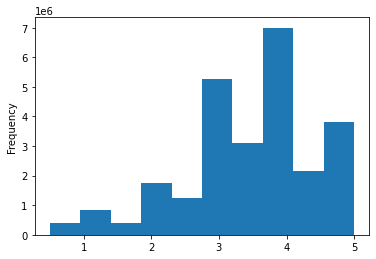

In [106]:
# Display a histogram of ratings distribution
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()